In [1]:
# importing required library to the project

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading the csv file into the project

path = r"D:\Warun Kumar\Data Scientist\Data Set\bank_marketing_updated_v1.csv"       # r is used as raw string to ignore the backslash
data = pd.read_csv(path)
print(data)

       customerid   age  salary  balance   marital                  jobedu  \
0               1  58.0  100000     2143   married     management,tertiary   
1               2  44.0   60000       29    single    technician,secondary   
2               3  33.0  120000        2   married  entrepreneur,secondary   
3               4  47.0   20000     1506   married     blue-collar,unknown   
4               5  33.0       0        1    single         unknown,unknown   
...           ...   ...     ...      ...       ...                     ...   
45206       45207  51.0   60000      825   married     technician,tertiary   
45207       45208  71.0   55000     1729  divorced         retired,primary   
45208       45209  72.0   55000     5715   married       retired,secondary   
45209       45210  57.0   20000      668   married   blue-collar,secondary   
45210       45211  37.0  120000     2971   married  entrepreneur,secondary   

      targeted default housing loan    contact  day      month 

In [3]:
# 1. Understanding the Dataset
# a. Load and scrutinize the dataset to comprehend its structure,encompassing columns and data types.

# Reviewing the first look of the data.

data.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [4]:
# Reviewing the datatype of the columns

print(data.dtypes)

customerid      int64
age           float64
salary          int64
balance         int64
marital        object
jobedu         object
targeted       object
default        object
housing        object
loan           object
contact        object
day             int64
month          object
duration       object
campaign        int64
pdays           int64
previous        int64
poutcome       object
response       object
dtype: object


In [5]:
# Data Cleaning

# Splitting column "jobedu" to "Job" and "Education"
data[['Job', 'Education']] = data['jobedu'].str.split(',',expand = True)

# Dropping column "jobedu"
data.drop(columns = ['jobedu'], inplace = True)

print(data.head())

   customerid   age  salary  balance  marital targeted default housing loan  \
0           1  58.0  100000     2143  married      yes      no     yes   no   
1           2  44.0   60000       29   single      yes      no     yes   no   
2           3  33.0  120000        2  married      yes      no     yes  yes   
3           4  47.0   20000     1506  married       no      no     yes   no   
4           5  33.0       0        1   single       no      no      no   no   

   contact  day      month duration  campaign  pdays  previous poutcome  \
0  unknown    5  may, 2017  261 sec         1     -1         0  unknown   
1  unknown    5  may, 2017  151 sec         1     -1         0  unknown   
2  unknown    5  may, 2017   76 sec         1     -1         0  unknown   
3  unknown    5  may, 2017   92 sec         1     -1         0  unknown   
4  unknown    5  may, 2017  198 sec         1     -1         0  unknown   

  response           Job  Education  
0       no    management   tertiary 

In [6]:
data.head()

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,Job,Education
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,5,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [7]:
# Combining "day" and "month" columns into a single "date" column

data['Date'] = data['day'].astype(str) + '-' + data['month']

# dropping original "day" and "month" columns
data.drop(columns = ['day','month'], inplace = True)

data.head()

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,response,Job,Education,Date
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,261 sec,1,-1,0,unknown,no,management,tertiary,"5-may, 2017"
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,151 sec,1,-1,0,unknown,no,technician,secondary,"5-may, 2017"
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,76 sec,1,-1,0,unknown,no,entrepreneur,secondary,"5-may, 2017"
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,92 sec,1,-1,0,unknown,no,blue-collar,unknown,"5-may, 2017"
4,5,33.0,0,1,single,no,no,no,no,unknown,198 sec,1,-1,0,unknown,no,unknown,unknown,"5-may, 2017"


In [8]:
# Renaming columns "Date", "Job", "Education" to "date", "job", "education"

data.rename(columns={'Date': 'date', 'Job':'job', 'Education':'education'}, inplace=True)
data.head()

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,response,job,education,date
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,261 sec,1,-1,0,unknown,no,management,tertiary,"5-may, 2017"
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,151 sec,1,-1,0,unknown,no,technician,secondary,"5-may, 2017"
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,76 sec,1,-1,0,unknown,no,entrepreneur,secondary,"5-may, 2017"
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,92 sec,1,-1,0,unknown,no,blue-collar,unknown,"5-may, 2017"
4,5,33.0,0,1,single,no,no,no,no,unknown,198 sec,1,-1,0,unknown,no,unknown,unknown,"5-may, 2017"


In [9]:
# Convert 'date' column to datetime type

data['date'] = pd.to_datetime(data['date'], format='%d-%b, %Y')
data.head()

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,response,job,education,date
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,261 sec,1,-1,0,unknown,no,management,tertiary,2017-05-05
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,151 sec,1,-1,0,unknown,no,technician,secondary,2017-05-05
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,76 sec,1,-1,0,unknown,no,entrepreneur,secondary,2017-05-05
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,92 sec,1,-1,0,unknown,no,blue-collar,unknown,2017-05-05
4,5,33.0,0,1,single,no,no,no,no,unknown,198 sec,1,-1,0,unknown,no,unknown,unknown,2017-05-05


In [10]:
# Splitting column "duration" to "durations" and "unit"

data[['durations','unit']] = data['duration'].str.split(' ',expand = True)

# dropping original column "duration"
data.drop(columns = ['duration'], inplace = True)

data.head()

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,campaign,pdays,previous,poutcome,response,job,education,date,durations,unit
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,1,-1,0,unknown,no,management,tertiary,2017-05-05,261,sec
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,1,-1,0,unknown,no,technician,secondary,2017-05-05,151,sec
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,1,-1,0,unknown,no,entrepreneur,secondary,2017-05-05,76,sec
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,1,-1,0,unknown,no,blue-collar,unknown,2017-05-05,92,sec
4,5,33.0,0,1,single,no,no,no,no,unknown,1,-1,0,unknown,no,unknown,unknown,2017-05-05,198,sec


In [11]:
data.tail(10)

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,campaign,pdays,previous,poutcome,response,job,education,date,durations,unit
45201,45202,53.0,100000,583,married,yes,no,no,no,cellular,1,184,4,success,yes,management,tertiary,2017-11-17,3.76666666666667,min
45202,45203,34.0,50000,557,single,yes,no,no,no,cellular,1,-1,0,unknown,yes,admin.,secondary,2017-11-17,3.73333333333333,min
45203,45204,23.0,4000,113,single,no,no,no,no,cellular,1,-1,0,unknown,yes,student,tertiary,2017-11-17,4.43333333333333,min
45204,45205,73.0,55000,2850,married,yes,no,no,no,cellular,1,40,8,failure,yes,retired,secondary,2017-11-17,5,min
45205,45206,25.0,60000,505,single,yes,no,no,yes,cellular,2,-1,0,unknown,yes,technician,secondary,2017-11-17,6.43333333333333,min
45206,45207,51.0,60000,825,married,yes,no,no,no,cellular,3,-1,0,unknown,yes,technician,tertiary,2017-11-17,16.2833333333333,min
45207,45208,71.0,55000,1729,divorced,yes,no,no,no,cellular,2,-1,0,unknown,yes,retired,primary,2017-11-17,7.6,min
45208,45209,72.0,55000,5715,married,yes,no,no,no,cellular,5,184,3,success,yes,retired,secondary,2017-11-17,18.7833333333333,min
45209,45210,57.0,20000,668,married,yes,no,no,no,telephone,4,-1,0,unknown,no,blue-collar,secondary,2017-11-17,8.46666666666667,min
45210,45211,37.0,120000,2971,married,yes,no,no,no,cellular,2,188,11,other,no,entrepreneur,secondary,2017-11-17,6.01666666666667,min


In [12]:
# Converting column "durations" to float
data['durations'] = data['durations'].astype(float)

# Converting duration into seconds for unit value is min by multiplying by 60

data.loc[data['unit'] == 'min', 'durations'] *= 60

data.tail(10)

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,campaign,pdays,previous,poutcome,response,job,education,date,durations,unit
45201,45202,53.0,100000,583,married,yes,no,no,no,cellular,1,184,4,success,yes,management,tertiary,2017-11-17,226.0,min
45202,45203,34.0,50000,557,single,yes,no,no,no,cellular,1,-1,0,unknown,yes,admin.,secondary,2017-11-17,224.0,min
45203,45204,23.0,4000,113,single,no,no,no,no,cellular,1,-1,0,unknown,yes,student,tertiary,2017-11-17,266.0,min
45204,45205,73.0,55000,2850,married,yes,no,no,no,cellular,1,40,8,failure,yes,retired,secondary,2017-11-17,300.0,min
45205,45206,25.0,60000,505,single,yes,no,no,yes,cellular,2,-1,0,unknown,yes,technician,secondary,2017-11-17,386.0,min
45206,45207,51.0,60000,825,married,yes,no,no,no,cellular,3,-1,0,unknown,yes,technician,tertiary,2017-11-17,977.0,min
45207,45208,71.0,55000,1729,divorced,yes,no,no,no,cellular,2,-1,0,unknown,yes,retired,primary,2017-11-17,456.0,min
45208,45209,72.0,55000,5715,married,yes,no,no,no,cellular,5,184,3,success,yes,retired,secondary,2017-11-17,1127.0,min
45209,45210,57.0,20000,668,married,yes,no,no,no,telephone,4,-1,0,unknown,no,blue-collar,secondary,2017-11-17,508.0,min
45210,45211,37.0,120000,2971,married,yes,no,no,no,cellular,2,188,11,other,no,entrepreneur,secondary,2017-11-17,361.0,min


In [13]:
# dropping "unit" column and renaming "durations" columns as "duration_in-sec"

data.drop(columns = ['unit'], inplace = True)
data.rename(columns={'durations': 'duration_in_sec'}, inplace=True)

data.head()

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,campaign,pdays,previous,poutcome,response,job,education,date,duration_in_sec
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,1,-1,0,unknown,no,management,tertiary,2017-05-05,261.0
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,1,-1,0,unknown,no,technician,secondary,2017-05-05,151.0
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,1,-1,0,unknown,no,entrepreneur,secondary,2017-05-05,76.0
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,1,-1,0,unknown,no,blue-collar,unknown,2017-05-05,92.0
4,5,33.0,0,1,single,no,no,no,no,unknown,1,-1,0,unknown,no,unknown,unknown,2017-05-05,198.0


In [14]:
data.describe(include='all')

C:\Users\pc\AppData\Local\Temp\ipykernel_16404\1336221646.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')


,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,campaign,pdays,previous,poutcome,response,job,education,date,duration_in_sec
count,45211.000000,45191.000000,45211.000000,45211.000000,45211,45211,45211,45211,45211,45211,45211.000000,45211.000000,45211.000000,45211,45181,45211,45211,45161,45211.000000
unique,NaN,NaN,NaN,NaN,3,2,2,2,2,3,NaN,NaN,NaN,4,2,12,4,318,NaN
top,NaN,NaN,NaN,NaN,married,yes,no,yes,no,cellular,NaN,NaN,NaN,unknown,no,blue-collar,secondary,2017-05-15 00:00:00,NaN
freq,NaN,NaN,NaN,NaN,27214,37091,44396,25130,37967,29285,NaN,NaN,NaN,36959,39894,9732,23202,1124,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-06 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-31 00:00:00,NaN
mean,22606.000000,40.935651,57006.171065,1362.272058,NaN,NaN,NaN,NaN,NaN,NaN,2.763841,40.197828,0.580323,NaN,NaN,NaN,NaN,NaN,258.163080
std,13051.435847,10.619198,32085.718415,3044.765829,NaN,NaN,NaN,NaN,NaN,NaN,3.098021,100.128746,2.303441,NaN,NaN,NaN,NaN,NaN,257.527812
min,1.000000,18.000000,0.000000,-8019.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,11303.500000,33.000000,20000.000000,72.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,103.000000


In [15]:
# b. Inspect for any instances of missing values, outliers, or data inconsistencies.

# Count empty values in each column

empty_counts = data.isna().sum()
empty_counts

customerid          0
age                20
salary              0
balance             0
marital             0
targeted            0
default             0
housing             0
loan                0
contact             0
campaign            0
pdays               0
previous            0
poutcome            0
response           30
job                 0
education           0
date               50
duration_in_sec     0
dtype: int64

In [16]:
# Fill missing values in the "age" column with the mean age

data['age'] = data['age'].fillna(data['age'].mean())

# Fill missing values in the "response" column with "Unknown"

data['response'] = data['response'].fillna("Unknown")

# Fill missing values in the "response" column with "Unknown"

data['date'] = data['date'].fillna(data['date'].max())

In [17]:
# Inspect unique values and their counts in columns "marital", "targeted", "default", "housing", "loan", "contact", 
# "poutcome", "response", "job", "education"  

unique_marital = data['marital'].value_counts()
unique_targeted = data['targeted'].value_counts()
unique_default = data['default'].value_counts()
unique_housing = data['housing'].value_counts()
unique_loan = data['loan'].value_counts()
unique_contact = data['contact'].value_counts()
unique_poutcome = data['poutcome'].value_counts()
unique_response = data['response'].value_counts()
unique_job = data['job'].value_counts()
unique_education = data['education'].value_counts()

print("Unique marital values:")
print(unique_marital)

print("Unique targeted values:")
print(unique_targeted)

print("Unique default values:")
print(unique_default)

print("Unique housing values:")
print(unique_housing)

print("Unique loan values:")
print(unique_loan)

print("Unique contact values:")
print(unique_contact)

print("Unique poutcome values:")
print(unique_poutcome)

print("Unique response values:")
print(unique_response)

print("Unique job values:")
print(unique_job)

print("Unique education values:")
print(unique_education)


Unique marital values:
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
Unique targeted values:
yes    37091
no      8120
Name: targeted, dtype: int64
Unique default values:
no     44396
yes      815
Name: default, dtype: int64
Unique housing values:
yes    25130
no     20081
Name: housing, dtype: int64
Unique loan values:
no     37967
yes     7244
Name: loan, dtype: int64
Unique contact values:
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
Unique poutcome values:
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
Unique response values:
no         39894
yes         5287
Unknown       30
Name: response, dtype: int64
Unique job values:
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           9

In [18]:
# empty_counts = data.isna().sum()
# empty_counts
print(data.dtypes)

customerid                  int64
age                       float64
salary                      int64
balance                     int64
marital                    object
targeted                   object
default                    object
housing                    object
loan                       object
contact                    object
campaign                    int64
pdays                       int64
previous                    int64
poutcome                   object
response                   object
job                        object
education                  object
date               datetime64[ns]
duration_in_sec           float64
dtype: object


In [19]:
# Inspecting outliers in columns "salary", "age".

# Calculating Z-score for each value in the "salary" & "age" column
z_scores_salary = (data['salary'] - data['salary'].mean()) / data['salary'].std()
z_scores_age = (data['age'] - data['age'].mean()) / data['age'].std()

# Define a threshold for outliers
threshold = -3

# Find outliers
outliers_salary = data[abs(z_scores_salary) > threshold]
outliers_age = data[abs(z_scores_age) > threshold]

print("Outliers in salary column:")
print(outliers_salary)

print("Outliers in age column:")
print(outliers_age)

Outliers in salary column:
       customerid   age  salary  balance   marital targeted default housing  \
0               1  58.0  100000     2143   married      yes      no     yes   
1               2  44.0   60000       29    single      yes      no     yes   
2               3  33.0  120000        2   married      yes      no     yes   
3               4  47.0   20000     1506   married       no      no     yes   
4               5  33.0       0        1    single       no      no      no   
...           ...   ...     ...      ...       ...      ...     ...     ...   
45206       45207  51.0   60000      825   married      yes      no      no   
45207       45208  71.0   55000     1729  divorced      yes      no      no   
45208       45209  72.0   55000     5715   married      yes      no      no   
45209       45210  57.0   20000      668   married      yes      no      no   
45210       45211  37.0  120000     2971   married      yes      no      no   

      loan    contact  c

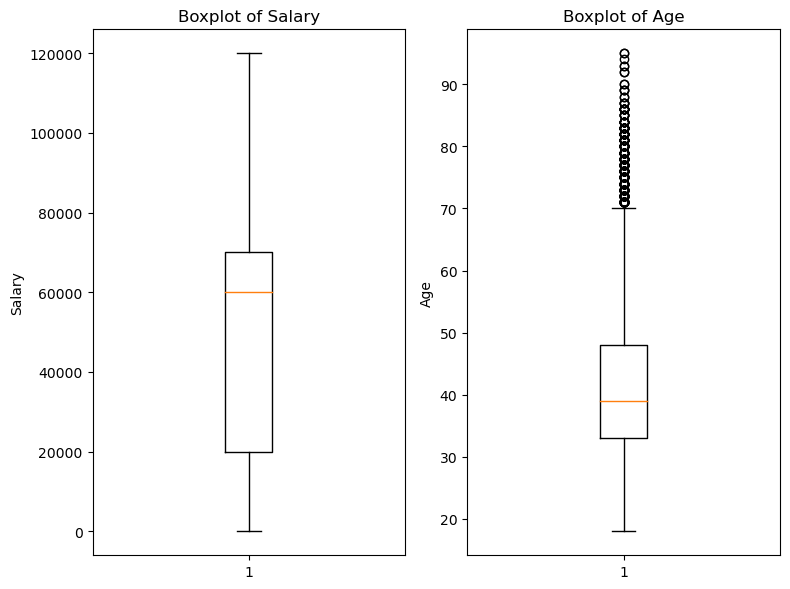

In [20]:
# Describing outliers in columns "salary" & "age" to showcase outlies using box plot.

# Create a figure and two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(8, 6))

# Plot a box plot to visualize the distribution of salaries
axs[0].boxplot(data['salary'])
axs[0].set_title('Boxplot of Salary')
axs[0].set_ylabel('Salary')

# Plot a box plot to visualize the distribution of age
axs[1].boxplot(data['age'])
axs[1].set_title('Boxplot of Age')
axs[1].set_ylabel('Age')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

In [21]:
'''
2. Descriptive Statistics
a. Derive summary statistics (mean, median, standard deviation) for relevant columns.
'''

# Derive summary statistics using describe() method for column "age" and "salary"
# summary_statistics = data[['age', 'salary']].describe()
# print("Summary statistics:")
# print(summary_statistics)

# Derive mean, median, and standard deviation individually for column "age" and "salary"
mean_age = data['age'].mean()
median_age = data['age'].median()
std_age = data['age'].std()

mean_salary = data['salary'].mean()
median_salary = data['salary'].median()
std_salary = data['salary'].std()

print("\nSummary statistics for age:")
print("Mean:", mean_age)
print("Median:", median_age)
print("Standard Deviation:", std_age)

print("\nSummary statistics for salary:")
print("Mean:", mean_salary)
print("Median:", median_salary)
print("Standard Deviation:", std_salary)



Summary statistics for age:
Mean: 40.93565090394105
Median: 39.0
Standard Deviation: 10.616848458807114

Summary statistics for salary:
Mean: 57006.17106456393
Median: 60000.0
Standard Deviation: 32085.718415166317


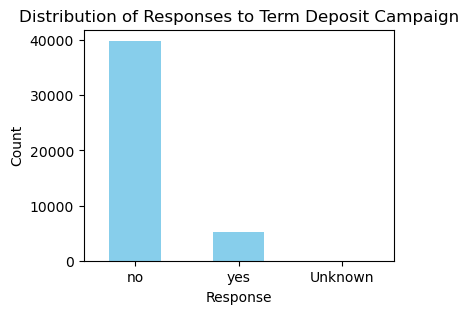

In [22]:
'''
2. Descriptive Statistics
b. Examine the distribution of the target variable, indicating responses to the term deposit campaign.
'''

# Plotting the bar grabh for the distribution of responses
plt.figure(figsize=(4, 3))
data['response'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Responses to Term Deposit Campaign')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

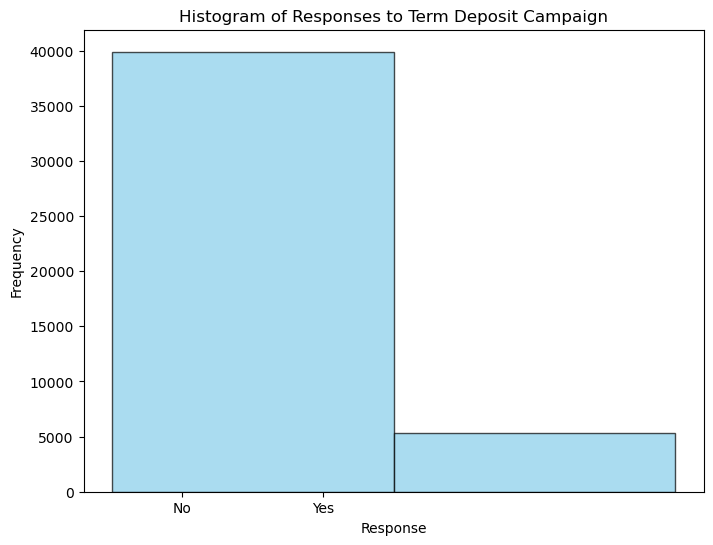

In [23]:
# Map 'yes' to 1 and 'no' to 0
#data['response'] = data['response'].map({'yes': 1, 'no': 0})

# Plotting the histogram of responses
plt.figure(figsize=(8, 6))
plt.hist(data['response'], bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Responses to Term Deposit Campaign')
plt.xlabel('Response')
plt.ylabel('Frequency')
plt.xticks([0.25, 0.75], ['No', 'Yes'])
plt.show()

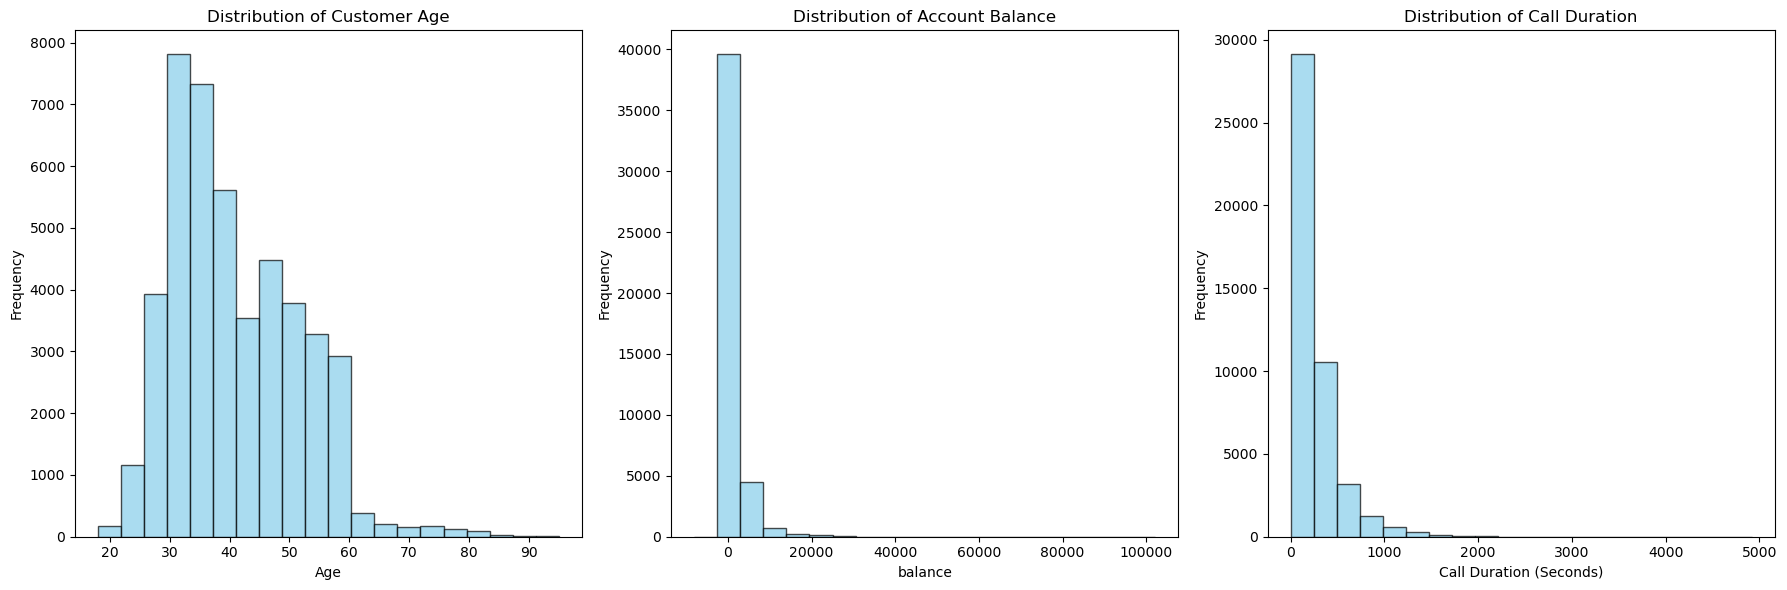

In [24]:
'''
3. Univariate Analysis
a. Examine the distribution of individual key features, such as age, balance, and call duration.
'''

# Set up the figure and axes for plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plotting histograms for age, balance, and call duration
axs[0].hist(data['age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axs[0].set_title('Distribution of Customer Age')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')

axs[1].hist(data['balance'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axs[1].set_title('Distribution of Account Balance')
axs[1].set_xlabel('balance')
axs[1].set_ylabel('Frequency')

axs[2].hist(data['duration_in_sec'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axs[2].set_title('Distribution of Call Duration')
axs[2].set_xlabel('Call Duration (Seconds)')
axs[2].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

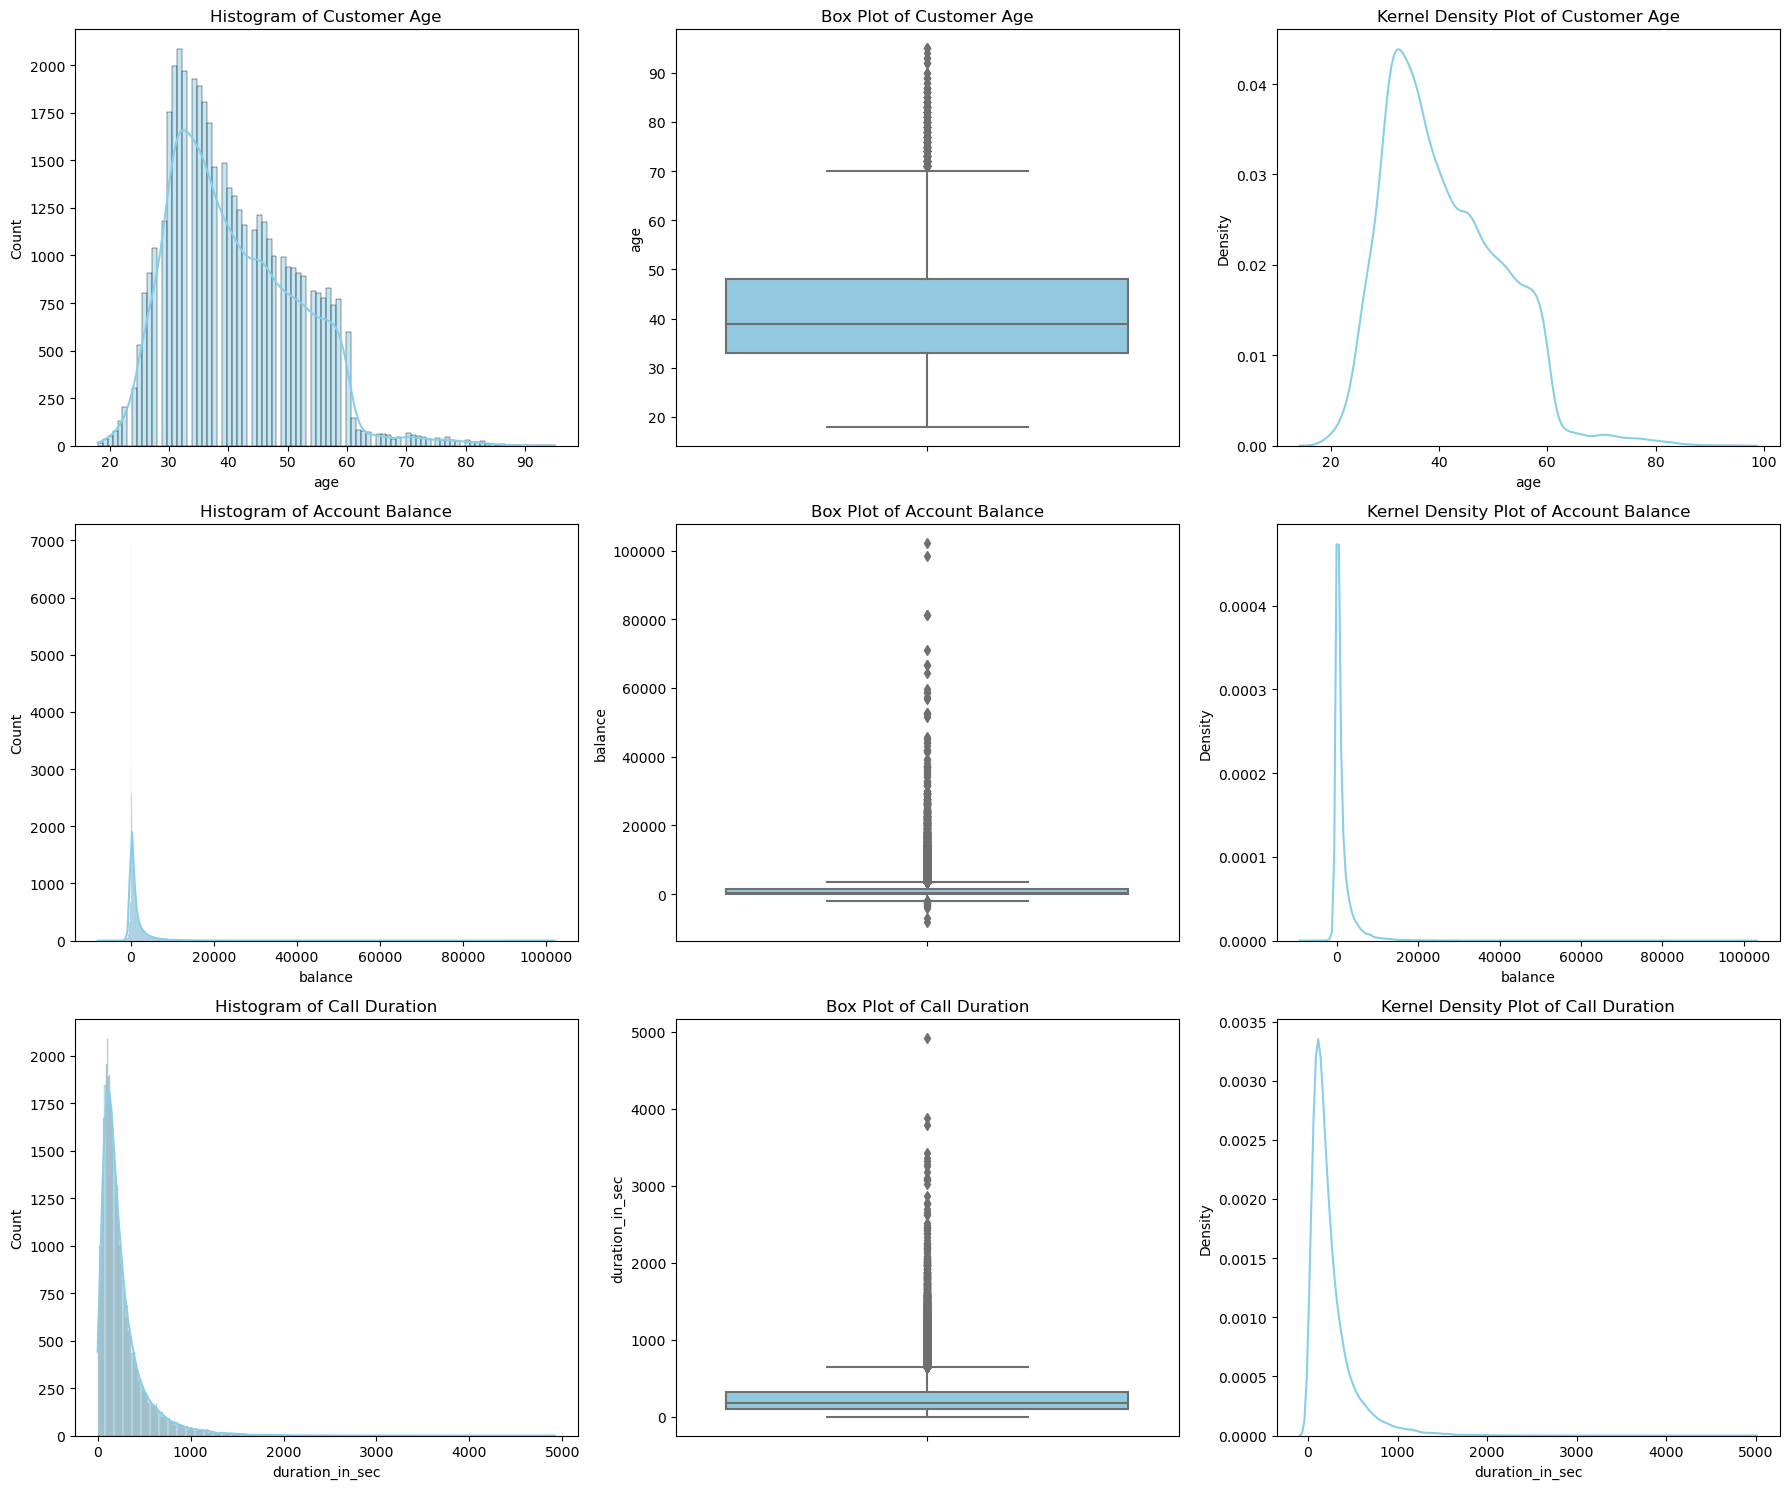

In [25]:
'''
3. Univariate Analysis
b. Employ visual aids like histograms, box plots, and kernel density plots to discern patterns and outliers.
'''

# Set up the figure and axes for plotting
fig, axs = plt.subplots(3, 3, figsize=(18, 15))

# Plot histograms
sns.histplot(data['age'], ax=axs[0, 0], kde=True, color='skyblue', edgecolor='black')
sns.histplot(data['balance'], ax=axs[1, 0], kde=True, color='skyblue', edgecolor='black')
sns.histplot(data['duration_in_sec'], ax=axs[2, 0], kde=True, color='skyblue', edgecolor='black')

# Plot box plots
sns.boxplot(y=data['age'], ax=axs[0, 1], color='skyblue')
sns.boxplot(y=data['balance'], ax=axs[1, 1], color='skyblue')
sns.boxplot(y=data['duration_in_sec'], ax=axs[2, 1], color='skyblue')

# Plot kernel density plots
sns.kdeplot(data['age'], ax=axs[0, 2], color='skyblue')
sns.kdeplot(data['balance'], ax=axs[1, 2], color='skyblue')
sns.kdeplot(data['duration_in_sec'], ax=axs[2, 2], color='skyblue')

# Set titles and labels
axs[0, 0].set_title('Histogram of Customer Age')
axs[0, 1].set_title('Box Plot of Customer Age')
axs[0, 2].set_title('Kernel Density Plot of Customer Age')

axs[1, 0].set_title('Histogram of Account Balance')
axs[1, 1].set_title('Box Plot of Account Balance')
axs[1, 2].set_title('Kernel Density Plot of Account Balance')

axs[2, 0].set_title('Histogram of Call Duration')
axs[2, 1].set_title('Box Plot of Call Duration')
axs[2, 2].set_title('Kernel Density Plot of Call Duration')

plt.tight_layout()
plt.show()

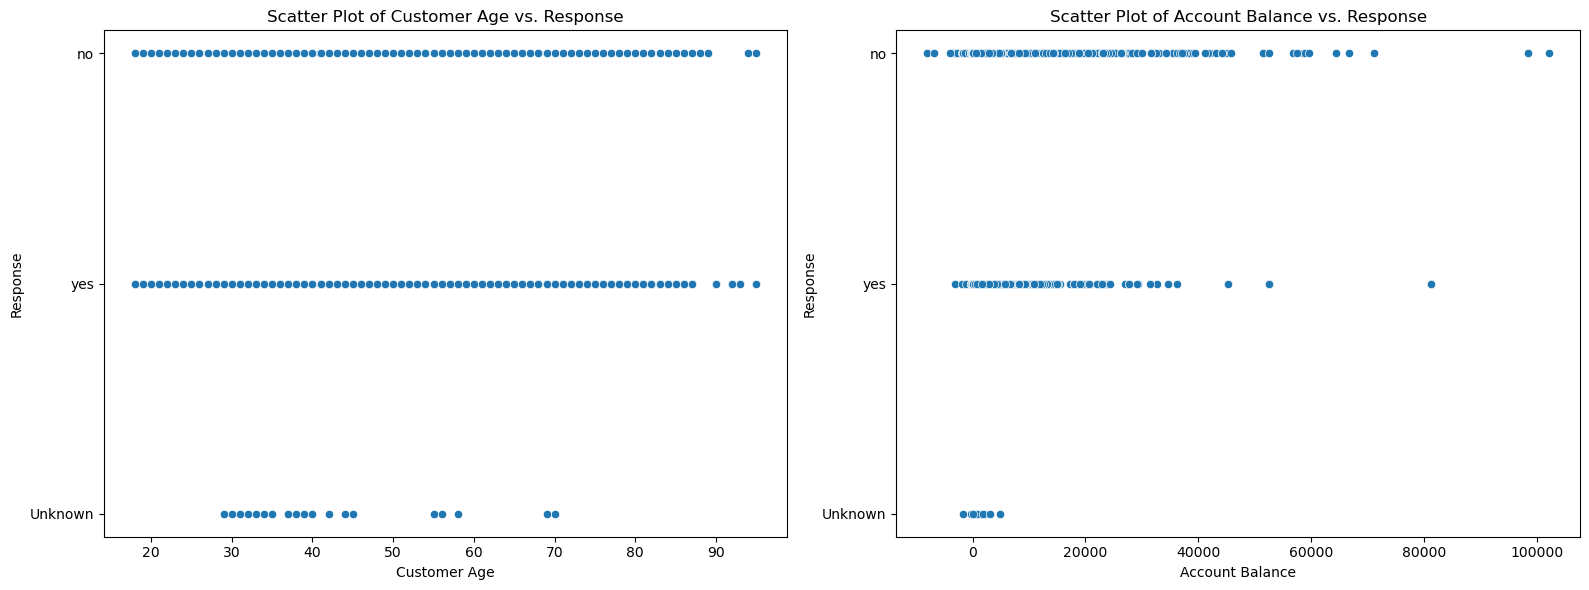

In [26]:
'''
Bivariate Analysis
a. Evaluate the relationship between independent variables and the target variable.

'''
df = data

# Map 'yes' to 1 and 'no' to 0 for the Response column
#df['response'] = df['response'].map({'yes': 1, 'no': 0})

# Set up the figure and axes for plotting
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plotting scatter plots of independent variables vs. target variable
sns.scatterplot(x='age', y='response', data=df, ax=axs[0])
axs[0].set_title('Scatter Plot of Customer Age vs. Response')
axs[0].set_ylabel('Response')
axs[0].set_xlabel('Customer Age')

sns.scatterplot(x='balance', y='response', data=df, ax=axs[1])
axs[1].set_title('Scatter Plot of Account Balance vs. Response')
axs[1].set_ylabel('Response')
axs[1].set_xlabel('Account Balance')

plt.tight_layout()
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_16404\1726900345.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='response', y='age', data=df, ci=None)


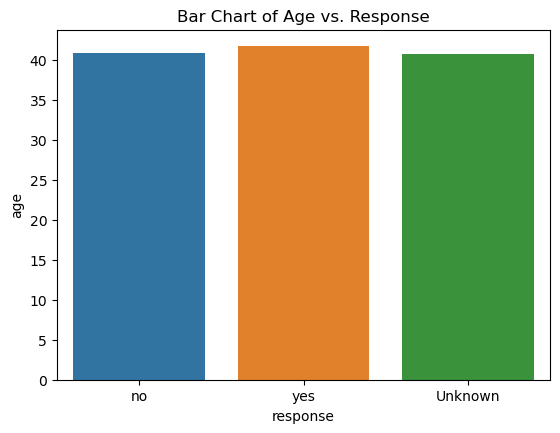

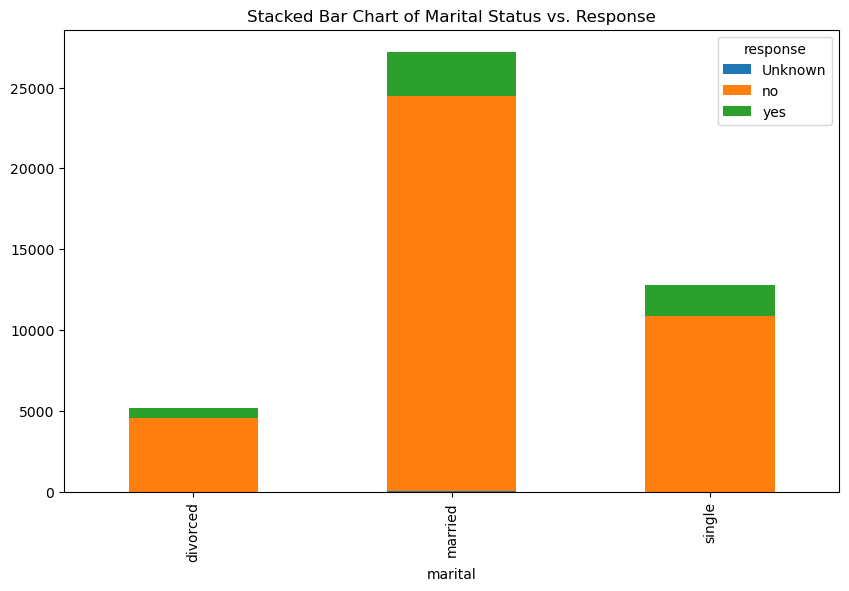

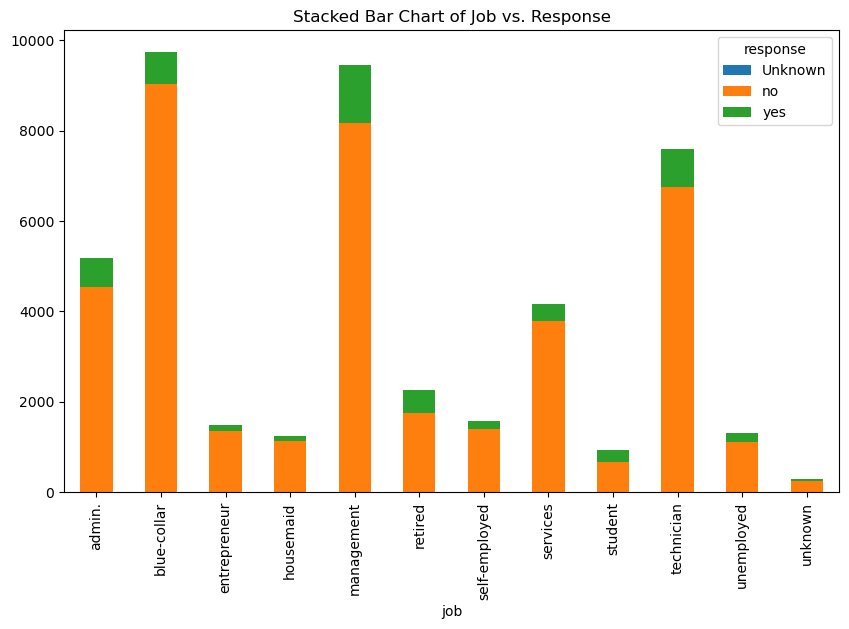

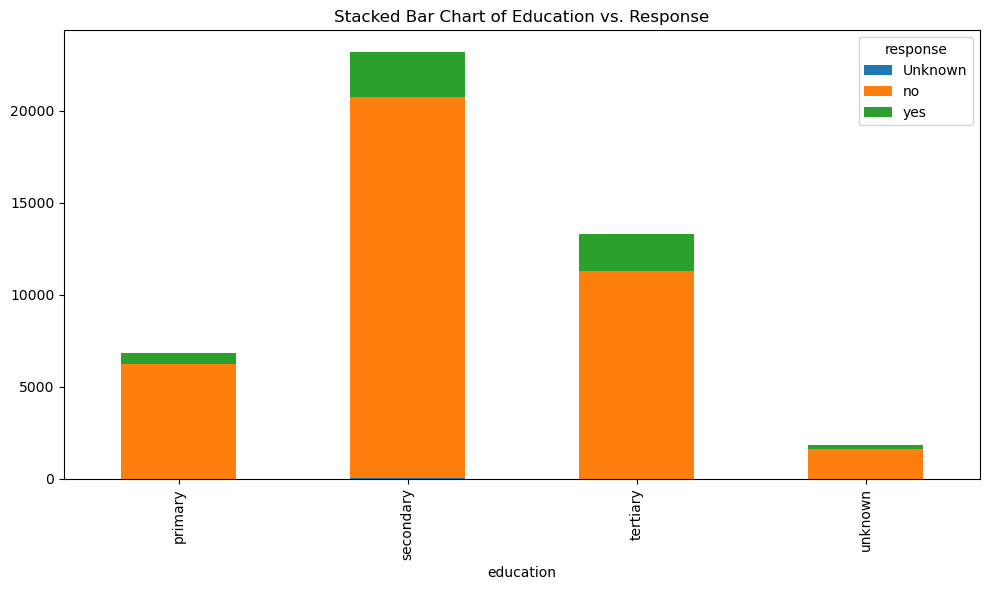

In [27]:
'''
Bivariate Analysis
b. Analyze how features like age, job type, education, marital status, etc., associate with the success of the term deposit 
campaign, using visualizations like bar charts, stacked bar charts, and heatmaps.

'''

# Map 'yes' to 1 and 'no' to 0 for the Response column
# df['Response'] = df['Response'].map({'yes': 1, 'no': 0})

# Plotting bar charts for the association between features and the success of the campaign
plt.figure(figsize=(14, 10))

# Bar chart for age vs. response
plt.subplot(2, 2, 1)
sns.barplot(x='response', y='age', data=df, ci=None)
plt.title('Bar Chart of Age vs. Response')

# Stacked bar chart for marital status vs. response
marital_status_response = pd.crosstab(df['marital'], df['response'])
marital_status_response.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Chart of Marital Status vs. Response')

# Stacked bar chart for job vs. response
job_response = pd.crosstab(df['job'], df['response'])
job_response.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Chart of Job vs. Response')

# Stacked bar chart for education vs. response
education_response = pd.crosstab(df['education'], df['response'])
education_response.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Chart of Education vs. Response')

plt.tight_layout()
plt.show()

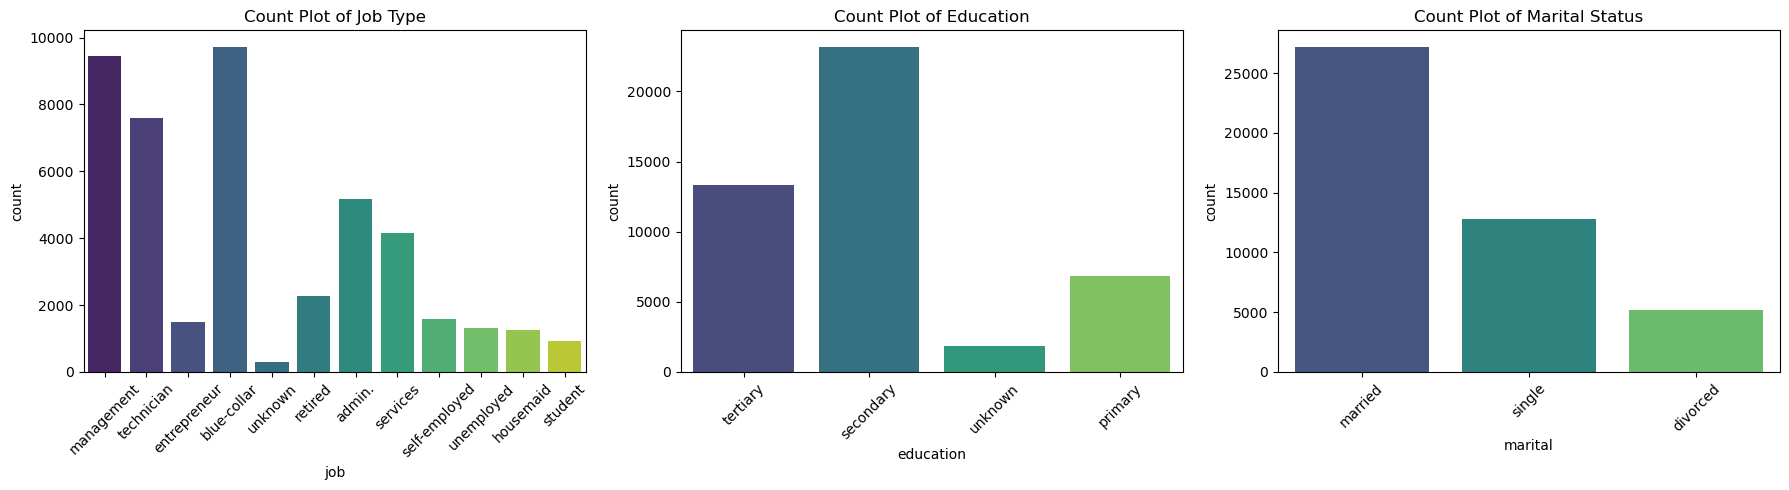

In [28]:
'''
5. Categorical Variables Analysis
a. Investigate the distribution of categorical variables such as job type, education, and marital status.
'''
# Plotting count plots for job type, education, and marital status
plt.figure(figsize=(18, 5))

# Count plot for job type
plt.subplot(1, 3, 1)
sns.countplot(x='job', data=df, palette='viridis')
plt.title('Count Plot of Job Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Count plot for education
plt.subplot(1, 3, 2)
sns.countplot(x='education', data=df, palette='viridis')
plt.title('Count Plot of Education')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Count plot for marital status
plt.subplot(1, 3, 3)
sns.countplot(x='marital', data=df, palette='viridis')
plt.title('Count Plot of Marital Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

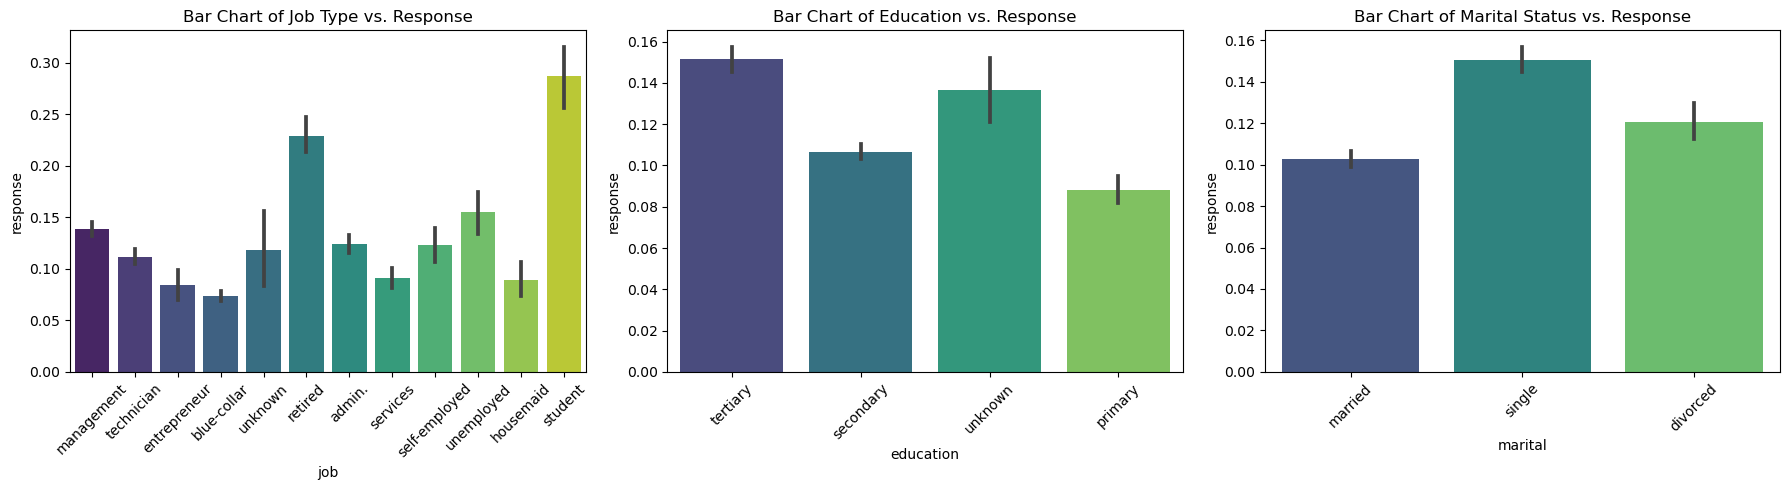

In [29]:
'''
5. Categorical Variables Analysis
b. Assess the impact of these categorical variables on the campaign's success through visualizations like bar charts.
'''
# Map 'yes' to 1 and 'no' to 0 and 'Unkown' to 3 for the Response column
df['response'] = df['response'].map({'yes': 1, 'no': 0, 'Unknown': 2})

# Plotting bar charts to assess the impact of categorical variables on campaign success
plt.figure(figsize=(18, 5))

# Bar chart for job type vs. response
plt.subplot(1, 3, 1)
sns.barplot(x='job', y='response', data=df, palette='viridis')
plt.title('Bar Chart of Job Type vs. Response')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Bar chart for education vs. response
plt.subplot(1, 3, 2)
sns.barplot(x='education', y='response', data=df, palette='viridis')
plt.title('Bar Chart of Education vs. Response')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Bar chart for marital status vs. response
plt.subplot(1, 3, 3)
sns.barplot(x='marital', y='response', data=df, palette='viridis')
plt.title('Bar Chart of Marital Status vs. Response')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

# Map 1 to 'yes' and 0 to 'no' and 3 to 'Unkown' for the Response column
df['response'] = df['response'].map({1 : 'yes', 0: 'no', 2: 'Unknown'})

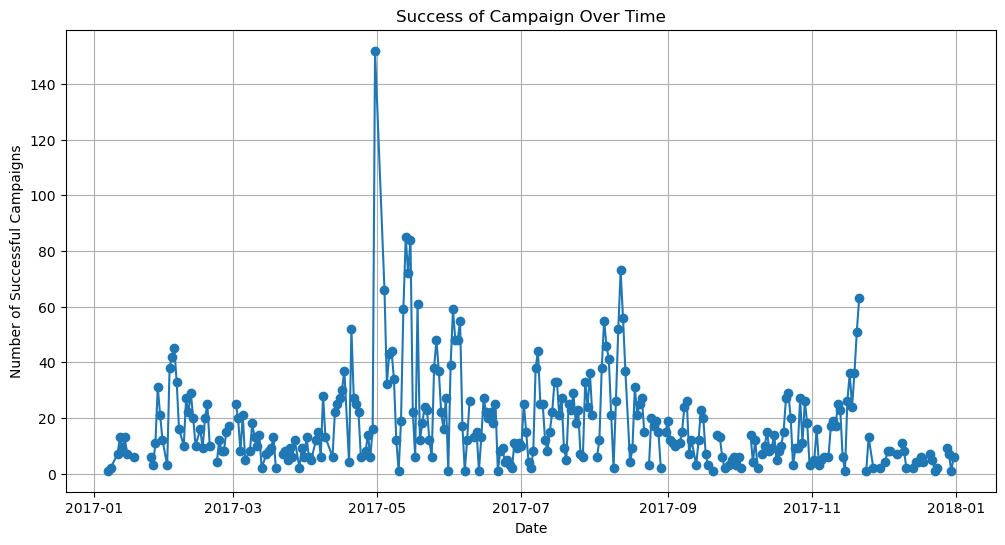

In [30]:
'''
6. Temporal Analysis
a. Investigate temporal patterns in the success of the campaign over time.
'''
 
# Group data by date and response
daily_campaigns = df.groupby(['date', 'response']).size().unstack()
 
# Plotting successful campaign counts over time
plt.figure(figsize=(12, 6))
plt.plot(daily_campaigns.index, daily_campaigns['yes'], marker='o', linestyle='-')
plt.title('Success of Campaign Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Successful Campaigns')
plt.grid(True)
plt.show()

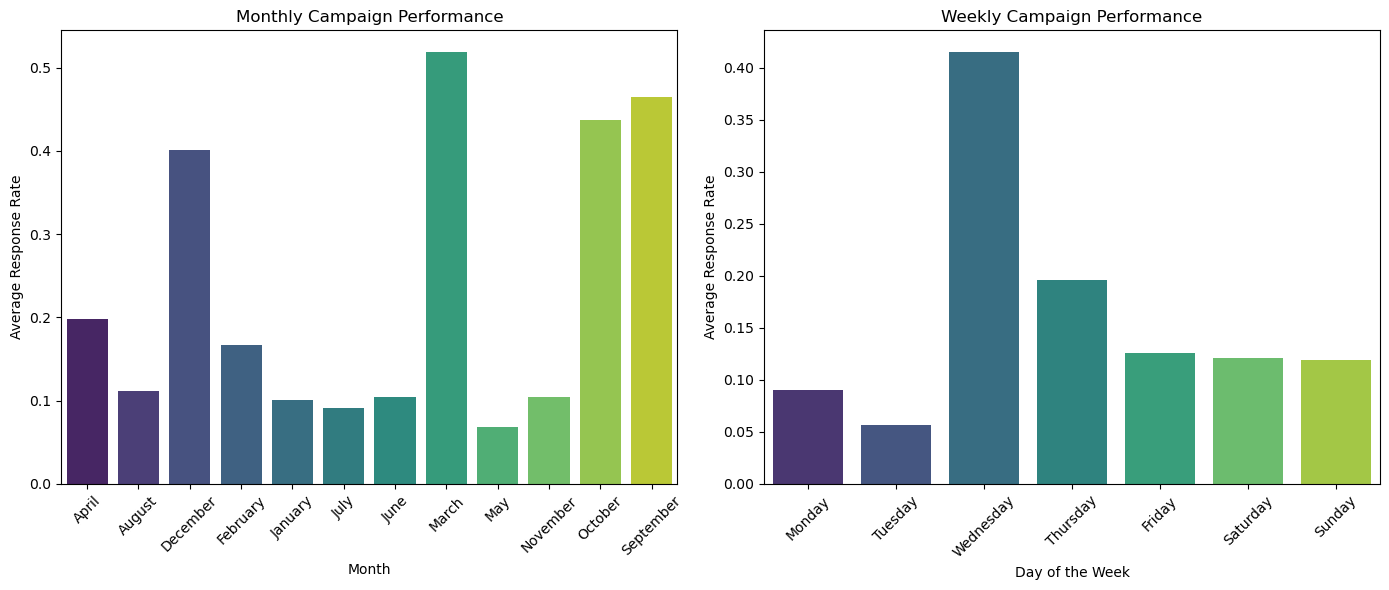

In [31]:
'''
6. Temporal Analysis
b. Analyze if specific months or days exhibit superior campaign performance.
'''

# Map 'yes' to 1 and 'no' to 0 and 'Unkown' to 3 for the Response column
df['response'] = df['response'].map({'yes': 1, 'no': 0, 'Unknown': 2})

# Convert 'Day_Contacted' to datetime format
# df['Day_Contacted'] = pd.to_datetime(df['Day_Contacted'])

# Extract month and day of the week from 'date'
df['Month'] = df['date'].dt.month_name()
df['Day_of_Week'] = df['date'].dt.day_name()

# Group by month and calculate the average response rate
monthly_performance = df.groupby('Month')['response'].mean().reset_index()

# Group by day of the week and calculate the average response rate
weekly_performance = df.groupby('Day_of_Week')['response'].mean().reset_index()

# Plotting bar charts to analyze monthly and weekly campaign performance
plt.figure(figsize=(14, 6))

# Bar chart for monthly performance
plt.subplot(1, 2, 1)
sns.barplot(x='Month', y='response', data=monthly_performance, palette='viridis')
plt.title('Monthly Campaign Performance')
plt.xlabel('Month')
plt.ylabel('Average Response Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Bar chart for weekly performance
plt.subplot(1, 2, 2)
sns.barplot(x='Day_of_Week', y='response', data=weekly_performance, palette='viridis',
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Weekly Campaign Performance')
plt.xlabel('Day of the Week')
plt.ylabel('Average Response Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

# Map 1 to 'yes' and 0 to 'no' and 3 to 'Unkown' for the Response column
df['response'] = df['response'].map({1 : 'yes', 0: 'no', 2: 'Unknown'})

In [32]:
'''
7. Feature Engineering
a. Introduce new features that may enhance prediction, such as creating age groups or income categories.
'''

# Map 'yes' to 1 and 'no' to 0 and 'Unkown' to 3 for the Response column
df['response'] = df['response'].map({'yes': 1, 'no': 0, 'Unknown': 2})

# Create age groups
bins = [20, 30, 40, 50, 60, 100]
labels = ['20-29', '30-39', '40-49', '50-59', '60+']
df['Age_Group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Create income categories
bins = [0, 30000, 60000, 90000, 120000, float('inf')]
labels = ['0-29k', '30k-59k', '60k-89k', '90k-119k', '120k+']
df['Income_Category'] = pd.cut(df['salary'], bins=bins, labels=labels, right=False)

# Display the modified DataFrame
print(df)

# Map 1 to 'yes' and 0 to 'no' and 3 to 'Unkown' for the Response column
df['response'] = df['response'].map({1 : 'yes', 0: 'no', 2: 'Unknown'})

       customerid   age  salary  balance   marital targeted default housing  \
0               1  58.0  100000     2143   married      yes      no     yes   
1               2  44.0   60000       29    single      yes      no     yes   
2               3  33.0  120000        2   married      yes      no     yes   
3               4  47.0   20000     1506   married       no      no     yes   
4               5  33.0       0        1    single       no      no      no   
...           ...   ...     ...      ...       ...      ...     ...     ...   
45206       45207  51.0   60000      825   married      yes      no      no   
45207       45208  71.0   55000     1729  divorced      yes      no      no   
45208       45209  72.0   55000     5715   married      yes      no      no   
45209       45210  57.0   20000      668   married      yes      no      no   
45210       45211  37.0  120000     2971   married      yes      no      no   

      loan    contact  ...  poutcome  response     

In [33]:
'''
7. Feature Engineering
b. Apply encoding techniques to transform categorical variables if necessary.
'''

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=['marital', 'job', 'education'])

# Display the encoded DataFrame
print(df_encoded)

       customerid   age  salary  balance targeted default housing loan  \
0               1  58.0  100000     2143      yes      no     yes   no   
1               2  44.0   60000       29      yes      no     yes   no   
2               3  33.0  120000        2      yes      no     yes  yes   
3               4  47.0   20000     1506       no      no     yes   no   
4               5  33.0       0        1       no      no      no   no   
...           ...   ...     ...      ...      ...     ...     ...  ...   
45206       45207  51.0   60000      825      yes      no      no   no   
45207       45208  71.0   55000     1729      yes      no      no   no   
45208       45209  72.0   55000     5715      yes      no      no   no   
45209       45210  57.0   20000      668      yes      no      no   no   
45210       45211  37.0  120000     2971      yes      no      no   no   

         contact  campaign  ...  job_self-employed  job_services job_student  \
0        unknown         1  ...

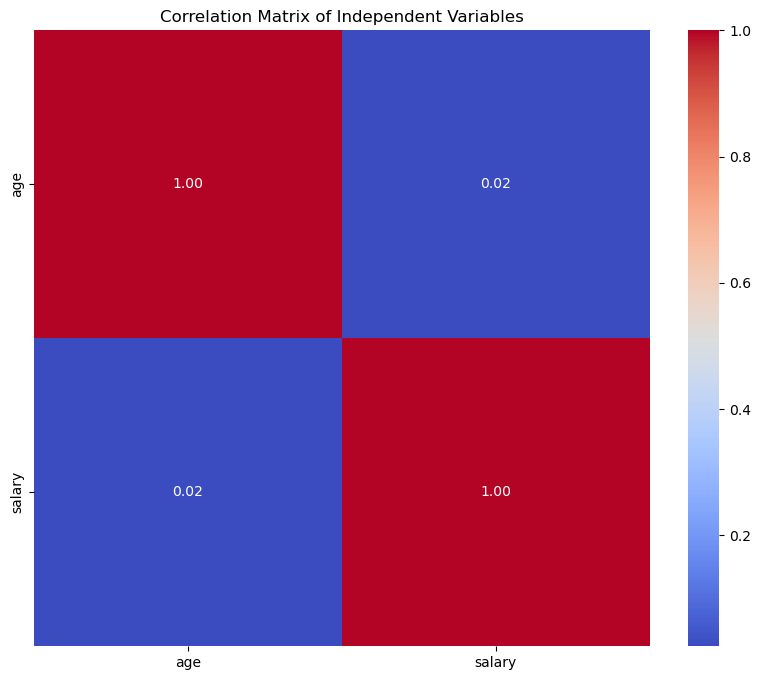

In [34]:
'''
8. Correlation Analysis
a. Examine correlations between independent variables to identify multicollinearity.
b. Evaluate how correlated features may influence the target variable.
'''

new_df = pd.DataFrame(df['age'])
new_df['salary'] = pd.DataFrame(df['salary'])


# Calculate correlations
correlation_matrix = new_df.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Independent Variables')
plt.show()


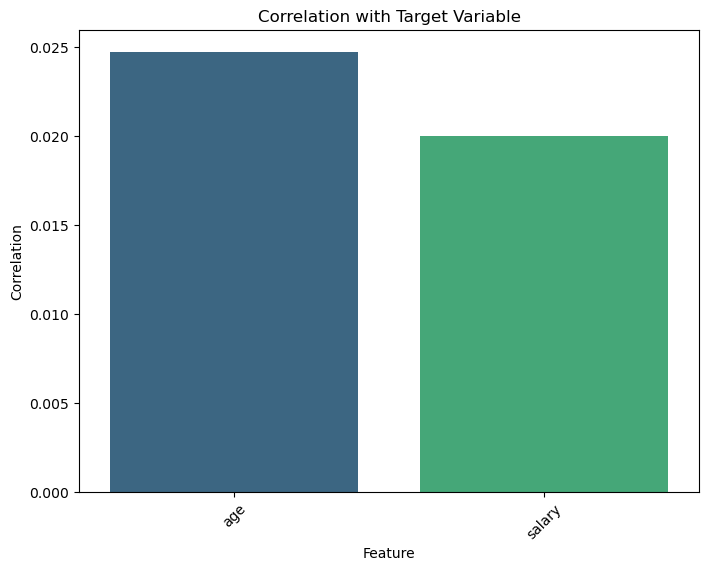

In [36]:
'''
8. Correlation Analysis
b. Evaluate how correlated features may influence the target variable.
'''

# Copy response column value to new_df
new_df['response'] = pd.DataFrame(df['response'])

# Map 'yes' to 1 and 'no' to 0 and 'Unkown' to 3 for the Response column
new_df['response'] = new_df['response'].map({'yes': 1, 'no': 0, 'Unknown': 2})

# Calculate correlations between features and target variable
correlation_with_target = new_df.corr()['response'].drop('response')  # Drop the correlation with itself

# Plot correlations
plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='viridis')
plt.title('Correlation with Target Variable')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()

# Map 1 to 'yes' and 0 to 'no' and 3 to 'Unkown' for the Response column
new_df['response'] = new_df['response'].map({1 : 'yes', 0: 'no', 2: 'Unknown'})

In [ ]:
'''9. Outlier Detection and Handling
a. Identify and rectify outliers that could impact the analysis and predictions.
'''
from scipy.stats import zscore

# Identify outliers using z-score
z_scores = zscore(df[['age', 'salary']])
outlier_threshold = 3  # Adjust as needed
outliers = (z_scores > outlier_threshold).any(axis=1)

# Remove outliers
clean_df = df[~outliers]

# Display cleaned DataFrame
print(clean_df)